# Rare Labels

**Rare values can add a lot of information or none at all.** Rare values in categorical variables tend to cause **over-fitting**, particularly in tree based methods. A big number of infrequent labels adds **noise, with little information**, therefore causing over-fitting. Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set. Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it. 

**Note** Sometimes rare values, are indeed important.It is difficult to derive reliable information from rare values!.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Dataset is HousingPrices:**
**Neighborhood:** Physical locations within Ames city limits
**Exterior1st:** Exterior covering on house
**Exterior2nd:** Exterior covering on house (if more than one material)**

In [36]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
data = pd.read_excel('HousingPrices.xls', usecols=use_cols)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500.0
1,Veenker,MetalSd,MetalSd,181500.0
2,CollgCr,VinylSd,VinylSd,223500.0
3,Crawfor,Wd Sdng,Wd Shng,140000.0
4,NoRidge,VinylSd,VinylSd,250000.0


**Look at the different number of labels in each variable (cardinality)!**

In [37]:
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())
print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  2919


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

For **each categorical variable**, find **percentage of houses**! then **plot** them! Add a **line at 5 % to flag the threshold for rare categories!**

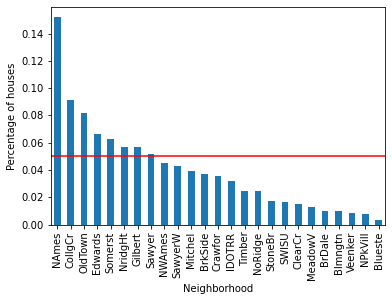

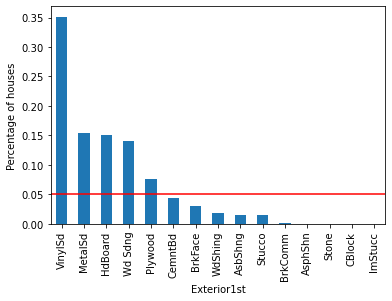

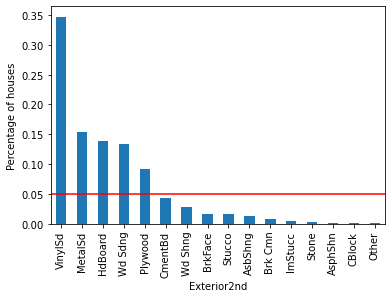

In [38]:
total_houses = len(data)
for col in cat_cols:
    temp_df = pd.Series(data[col].value_counts() / total_houses)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

### How is the target, "SalePrice", related to these categories?

**Find the mean SalePrice per group of houses that display each categories.**

**This function calculates the percentage of houses per category and the mean SalePrice per category!**

In [39]:
def calculate_mean_target_per_category(df, var):
    total_houses = len(df)  # total number of houses
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']  # percentage of houses per category
   
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')  # add the mean SalePrice
    return temp_df

**Now we use the function for the variable 'Neighborhood'!**

In [40]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.151764,145847.080000
1,CollgCr,0.091470,197965.773333
2,OldTown,0.081877,128225.300885
3,Edwards,0.066461,128219.700000
4,Somerst,0.062350,225379.837209
5,NridgHt,0.056869,316270.623377
6,Gilbert,0.056526,192854.506329
7,Sawyer,0.051730,136793.135135
8,NWAmes,0.044878,189050.068493
9,SawyerW,0.042823,186555.796610


The above dataframe contains the **percentage of houses** that show each one of the labels in Neighborhood, and the **mean SalePrice** for those group of houses. In other words, ~15% of houses are in NAmes and the mean SalePrice is 145847.

**This function plots the category frequency and mean SalePrice to visualise the relationship between the # target and the labels of the  categorical variable**

In [41]:
def plot_categories(df, var):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)
    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

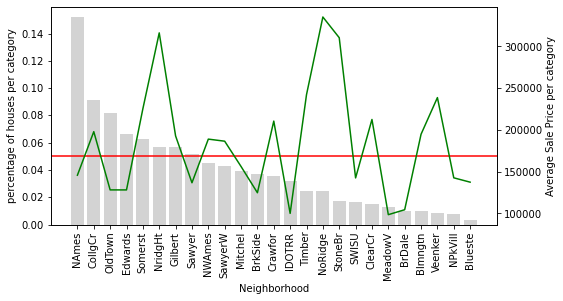

In [42]:
plot_categories(temp_df, 'Neighborhood')

Houses in the **Neighborhood of 'NridgHt'** sell at a **high price**, whereas houses in **'Sawyer'** tend to be **cheaper**. Houses in the **Neighborhood of StoneBr** have on average a high SalePrice, above 300k. However, **StoneBr is present in less than 5% of the houses**. Its effect on price can be under or over-estimated!

**Plot the remaining categorical variables!**

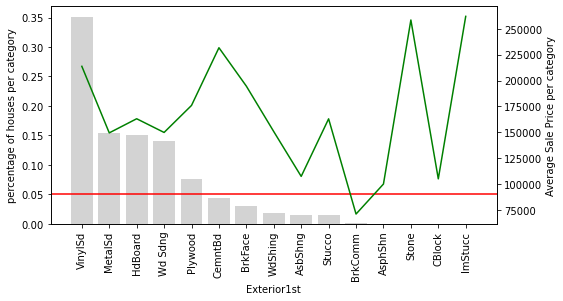

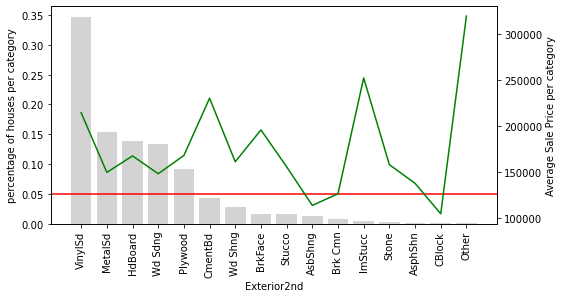

In [43]:
for col in cat_cols:
    if col !='Neighborhood': # we plotted this variable already
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)  # Use the function!

In **Exterior2nd** Most of the categories have **less than 5% of houses**. The "SalePrice" varies a lot, it looks **quite noisy**. These rare labels could indeed be **very predictive**, or they could be **introducing noise** rather than information. And because the labels are under-represented, we can't be sure because of under or over-estimating.

**Note:** This plot would bring more value, if we plotted the errors of the mean SalePrice. We can **add the standard deviation** to the plot!

### Rare labels: grouping under a new label

**We can group rare or infrequent values under an umbrella called 'Rare' or 'Other' to see the "collective" effect of the infrequent labels on the target!..**

**Replace all the labels that appear in less than 5% of the houses by the label 'rare'!**

In [44]:
def group_rare_labels(df, var):
    total_houses = len(df)
    temp_df = pd.Series(df[var].value_counts() / total_houses)  # % of houses
    grouping_dict = {  # Dictionary to replace the rare labels with the string! 
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index }
    tmp = df[var].map(grouping_dict)  # now I replace the rare categories
    return tmp

**Group rare labels in Neighborhood!**

In [45]:
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')
data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,rare
8,OldTown,OldTown
9,BrkSide,rare


**Plot Neighborhood with the grouped categories, using the function created!**

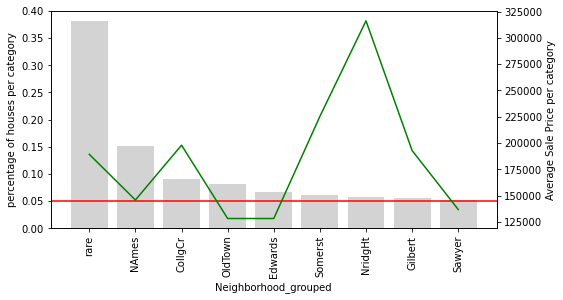

In [46]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the SalePrice.

**Let's plot the original Neighborhood for comparison**

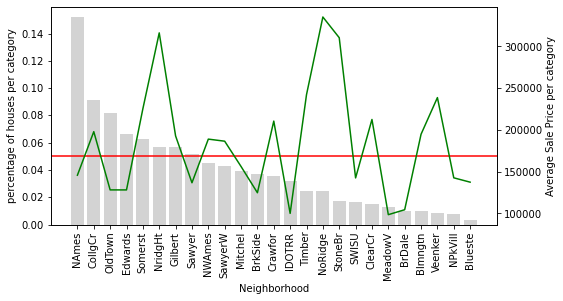

In [47]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average SalePrice for all the infrequent labels.

**Group and plot the remaining categorical variables!**

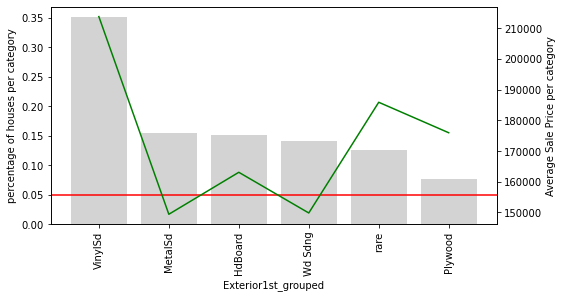

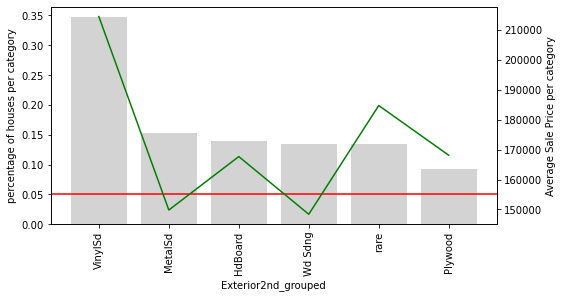

In [48]:
for col in cat_cols[1:]:
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Interestingly, In the variable **Exterior1st**, all the **houses with rare values** are on average **more expensive** than the rest, except for those with VinySd. The same is true for **Exterior2nd**. The rare categories seem to have had something in common.

**Note:** Ideally, we would also like to have **the standard deviation / inter-quantile range** for the SalePrice, to get an idea of how variable the house price is for each category.

### Rare labels lead to uneven distribution of categories in train and test sets

Similarly to **highly cardinal variables**, **rare or infrequent labels** often land only on the training set, or only on the testing set. This may lead to **over-fitting** or algorithm will **not know how to handle them!**

**Let's separate into training and testing set**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)
X_train.shape, X_test.shape

((2043, 3), (876, 3))

**Let's find labels present only in the training set, use X2 as example!**

In [50]:
unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()]
print(unique_to_train_set)

['AsphShn']


There are 4 categories present in the train set and are not present in the test set.

**Let's find labels present only in the test set!**

In [51]:
unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()]
print(unique_to_test_set)

[nan, 'ImStucc']


In this case, there is 1 rare value present in the test set only.